In [406]:
# NOTES:
# 2.Feature Selection: Research other features that can be added to the dataframe
# 3.Remove columns that have total counts instead of percentages (i.e FGP vs FGM or FGA) if not valid
# 4.Look at correlation of all columns (especially after creating new ones from research)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# to ignore the warnings
from warnings import filterwarnings

In [407]:
game_statistics_df = pd.read_csv('./data/gameStatistics.csv')
game_statistics_df.head()

,visitor_fastBreakPoints,visitor_pointsInPaint,visitor_biggestLead,visitor_secondChancePoints,visitor_pointsOffTurnovers,visitor_longestRun,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,...,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_plusMinus,home_min,home_team
0,15.0,48.0,25.0,5.0,23.0,15.0,120.0,40.0,86.0,46.5,...,31.0,46.0,21.0,27.0,9.0,18.0,4.0,-10.0,240:00,Houston Rockets
1,10.0,40.0,8.0,18.0,12.0,11.0,121.0,43.0,97.0,44.3,...,38.0,46.0,27.0,18.0,1.0,9.0,8.0,-3.0,240:00,Cleveland Cavaliers
2,14.0,36.0,7.0,3.0,6.0,16.0,108.0,38.0,78.0,48.7,...,36.0,54.0,19.0,18.0,8.0,7.0,4.0,8.0,240:00,Toronto Raptors
3,4.0,36.0,9.0,3.0,8.0,10.0,80.0,30.0,81.0,37.0,...,42.0,49.0,21.0,17.0,6.0,9.0,3.0,15.0,240:00,Oklahoma City Thunder
4,16.0,48.0,5.0,12.0,6.0,10.0,105.0,39.0,90.0,43.3,...,42.0,58.0,28.0,18.0,7.0,9.0,11.0,13.0,240:00,Memphis Grizzlies


In [408]:
game_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visitor_fastBreakPoints     809 non-null    float64
 1   visitor_pointsInPaint       809 non-null    float64
 2   visitor_biggestLead         809 non-null    float64
 3   visitor_secondChancePoints  809 non-null    float64
 4   visitor_pointsOffTurnovers  809 non-null    float64
 5   visitor_longestRun          809 non-null    float64
 6   visitor_points              4070 non-null   float64
 7   visitor_fgm                 4070 non-null   float64
 8   visitor_fga                 4070 non-null   float64
 9   visitor_fgp                 4070 non-null   float64
 10  visitor_ftm                 4070 non-null   float64
 11  visitor_fta                 4070 non-null   float64
 12  visitor_ftp                 4070 non-null   float64
 13  visitor_tpm                 4070 

In [409]:
# Convert values in percentage columns to decimal form
game_statistics_df[['visitor_ftp', 'visitor_fgp', 'visitor_tpp', 'home_ftp', 'home_fgp','home_tpp']] = game_statistics_df[
    ['visitor_ftp', 
     'visitor_fgp', 
     'visitor_tpp', 
     'home_ftp', 
     'home_fgp',
     'home_tpp']
    ].apply(lambda x: x / 100)

In [410]:
# Drop irrelevant columns
game_statistics_df = game_statistics_df.drop(columns=['visitor_fastBreakPoints', 'visitor_pointsInPaint',
       'visitor_biggestLead', 'visitor_secondChancePoints',
       'visitor_pointsOffTurnovers', 'visitor_longestRun','visitor_plusMinus',
       'visitor_min','home_fastBreakPoints',
       'home_pointsInPaint', 'home_biggestLead', 'home_secondChancePoints',
       'home_pointsOffTurnovers', 'home_longestRun','home_plusMinus', 'home_min','game_id'])

# Display
game_statistics_df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,120.0,40.0,86.0,0.465,26.0,31.0,0.839,14.0,33.0,0.424,...,0.333,15.0,31.0,46.0,21.0,27.0,9.0,18.0,4.0,Houston Rockets
1,121.0,43.0,97.0,0.443,19.0,21.0,0.905,16.0,38.0,0.421,...,0.320,8.0,38.0,46.0,27.0,18.0,1.0,9.0,8.0,Cleveland Cavaliers
2,108.0,38.0,78.0,0.487,17.0,19.0,0.895,15.0,34.0,0.441,...,0.314,18.0,36.0,54.0,19.0,18.0,8.0,7.0,4.0,Toronto Raptors
3,80.0,30.0,81.0,0.370,12.0,22.0,0.545,8.0,41.0,0.195,...,0.419,7.0,42.0,49.0,21.0,17.0,6.0,9.0,3.0,Oklahoma City Thunder
4,105.0,39.0,90.0,0.433,15.0,24.0,0.625,12.0,35.0,0.343,...,0.385,16.0,42.0,58.0,28.0,18.0,7.0,9.0,11.0,Memphis Grizzlies


In [411]:
game_statistics_df.isnull().sum()

visitor_points       2
visitor_fgm          2
visitor_fga          2
visitor_fgp          2
visitor_ftm          2
visitor_fta          2
visitor_ftp          2
visitor_tpm          2
visitor_tpa          2
visitor_tpp          2
visitor_offReb       2
visitor_defReb       2
visitor_totReb       2
visitor_assists      2
visitor_pFouls       2
visitor_steals       2
visitor_turnovers    2
visitor_blocks       2
visitor_team         0
home_points          2
home_fgm             2
home_fga             2
home_fgp             2
home_ftm             2
home_fta             2
home_ftp             2
home_tpm             2
home_tpa             2
home_tpp             2
home_offReb          2
home_defReb          2
home_totReb          2
home_assists         2
home_pFouls          2
home_steals          2
home_turnovers       2
home_blocks          2
home_team            0
dtype: int64

In [412]:
df = game_statistics_df.dropna()

# Feature Engineering

In [413]:
# Look at columns of data frame
df.columns

Index(['visitor_points', 'visitor_fgm', 'visitor_fga', 'visitor_fgp',
       'visitor_ftm', 'visitor_fta', 'visitor_ftp', 'visitor_tpm',
       'visitor_tpa', 'visitor_tpp', 'visitor_offReb', 'visitor_defReb',
       'visitor_totReb', 'visitor_assists', 'visitor_pFouls', 'visitor_steals',
       'visitor_turnovers', 'visitor_blocks', 'visitor_team', 'home_points',
       'home_fgm', 'home_fga', 'home_fgp', 'home_ftm', 'home_fta', 'home_ftp',
       'home_tpm', 'home_tpa', 'home_tpp', 'home_offReb', 'home_defReb',
       'home_totReb', 'home_assists', 'home_pFouls', 'home_steals',
       'home_turnovers', 'home_blocks', 'home_team'],
      dtype='object')

In [414]:
# Calculate Defensive Rebound Percentage
# High DRB%: Typically 78% or higher
# Average DRB%: Around 73% to 77%
# Low DRB%: 72% or lower
df['visitor_drb%'] = df['visitor_defReb'] / (df['visitor_defReb'] + df['home_offReb'])
df['home_drb%'] = df['home_defReb'] / (df['home_defReb'] + df['visitor_offReb'])


C:\Users\User\AppData\Local\Temp\ipykernel_27716\1781990913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_drb%'] = df['visitor_defReb'] / (df['visitor_defReb'] + df['home_offReb'])
C:\Users\User\AppData\Local\Temp\ipykernel_27716\1781990913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_drb%'] = df['home_defReb'] / (df['home_defReb'] + df['visitor_offReb'])


In [415]:
# Calculate Offensive Rebound Percentage
# High ORB%: 30% or higher
# Average ORB%: 20% and 27%
# Low ORB%: 19% or lower
df['visitor_orb%'] = df['visitor_offReb'] / (df['visitor_offReb'] + df['home_defReb'])
df['home_orb%'] = df['home_offReb'] / (df['home_offReb'] + df['visitor_defReb'])

C:\Users\User\AppData\Local\Temp\ipykernel_27716\112929147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_orb%'] = df['visitor_offReb'] / (df['visitor_offReb'] + df['home_defReb'])
C:\Users\User\AppData\Local\Temp\ipykernel_27716\112929147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_orb%'] = df['home_offReb'] / (df['home_offReb'] + df['visitor_defReb'])


In [416]:
# Calculate Free Throw Attempt Rate
# FTA Rate measures how often a team gets to the free-throw line relative to its field-goal attempts.
# An FTA Rate of around 0.2–0.3 is typical for NBA teams, but elite teams may exceed this range.
# It indicates how aggressive a team is in drawing fouls and earning free throws.
df['visitor_fta_rate'] = df['visitor_fta'] / df['visitor_fga']
df['home_fta_rate'] = df['home_fta'] / df['home_fga']

C:\Users\User\AppData\Local\Temp\ipykernel_27716\504875478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_fta_rate'] = df['visitor_fta'] / df['visitor_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_27716\504875478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_fta_rate'] = df['home_fta'] / df['home_fga']


In [417]:
# Benchmarks for TO% in the NBA:
# Excellent: Less than 12%
# Teams that excel at ball control and avoid turnovers.
# Good: 12% to 14%
# Solid ball-handling and decision-making.
# Average: 14% to 16%
# Typical for most teams; manageable turnovers without being costly.
# Poor: Greater than 16%
# Indicates sloppy play or excessive risk-taking.

# Calculate number of possessions
df['visitor_possessions'] = (
    df['visitor_fga'] + 0.44  * df['visitor_fta'] - df['visitor_offReb'] + df['visitor_turnovers']
    )

df['home_possessions'] = (
    df['home_fga'] + 0.44  * df['home_fta'] - df['home_offReb'] + df['home_turnovers']
    )

# Calculate turn over percentage
df['visitor_to%'] = (df['visitor_turnovers'] / df['visitor_possessions'])
df['home_to%'] = (df['home_turnovers'] / df['home_possessions'])

C:\Users\User\AppData\Local\Temp\ipykernel_27716\850005718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_possessions'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_27716\850005718.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_possessions'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_27716\850005718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [418]:
# Calculate Offensive Rating (ORtg)
df['visitor_ORtg'] = (df['visitor_points'] / df['visitor_possessions']) * 100
df['home_ORtg'] = (df['home_points'] / df['home_possessions']) * 100

# Calculate Defensive Rating (DRtg)
df['visitor_DRtg'] = (df['home_points'] / df['visitor_possessions']) * 100
df['home_DRtg'] = (df['visitor_points'] / df['home_possessions']) * 100


C:\Users\User\AppData\Local\Temp\ipykernel_27716\1931105852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_ORtg'] = (df['visitor_points'] / df['visitor_possessions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_27716\1931105852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ORtg'] = (df['home_points'] / df['home_possessions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_27716\1931105852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [419]:
# Calculate Turn Over Ratio (TO)
# (TO * 100) / (FGA + (FTA * 0.44) + AST + TO)
df['visitor_turn_over_ratio'] = (df['visitor_turnovers'] * 100) / (df['visitor_fga'] + ((df['visitor_fta']) * 0.44) + df['visitor_assists'] + df['visitor_turnovers'])
df['home_turn_over_ratio'] = (df['home_turnovers'] * 100) / (df['home_fga'] + ((df['home_fta']) * 0.44) + df['home_assists'] + df['home_turnovers'])

C:\Users\User\AppData\Local\Temp\ipykernel_27716\590228462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_turn_over_ratio'] = (df['visitor_turnovers'] * 100) / (df['visitor_fga'] + ((df['visitor_fta']) * 0.44) + df['visitor_assists'] + df['visitor_turnovers'])
C:\Users\User\AppData\Local\Temp\ipykernel_27716\590228462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_turn_over_ratio'] = (df['home_turnovers'] * 100) / (df['home_fga'] + ((df['home_fta']) * 0.44) + df['home_assists'

In [420]:
# Create a column for both the home team and visitor team to calculate effective field goal percentage
# EFG - A statistics that adjust field goal percentage to show that three point shots are worth more than two point shots
df['visitor_efg%'] = (df['visitor_fgm'] + (0.5 * df['visitor_tpm'])) / df['visitor_fga']
df['home_efg%'] = (df['home_fgm'] + (0.5 * df['home_tpm'])) / df['home_fga']


# Measures the teams efficiency at shooting the ball
# Calculate the teams True Shooting Percentage
df['visitor_ts%'] = (df['visitor_points'] / (2 * (df['visitor_fga'] + (0.44 * df['visitor_fta']))))
df['home_ts%'] = (df['home_points'] / (2 * (df['home_fga'] + (0.44 * df['home_fta']))))

C:\Users\User\AppData\Local\Temp\ipykernel_27716\2711518468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_efg%'] = (df['visitor_fgm'] + (0.5 * df['visitor_tpm'])) / df['visitor_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_27716\2711518468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_efg%'] = (df['home_fgm'] + (0.5 * df['home_tpm'])) / df['home_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_27716\2711518468.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [421]:
df['points_diff'] = df['home_points'] - df['visitor_points']
df['rebounds_diff'] = df['home_totReb'] - df['visitor_totReb']
df['turnovers_diff'] = df['home_turnovers'] - df['visitor_turnovers']

C:\Users\User\AppData\Local\Temp\ipykernel_27716\998461143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_diff'] = df['home_points'] - df['visitor_points']
C:\Users\User\AppData\Local\Temp\ipykernel_27716\998461143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rebounds_diff'] = df['home_totReb'] - df['visitor_totReb']
C:\Users\User\AppData\Local\Temp\ipykernel_27716\998461143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [422]:
# Display
df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,points_diff,rebounds_diff,turnovers_diff
0,120.0,40.0,86.0,0.465,26.0,31.0,0.839,14.0,33.0,0.424,...,115.964438,10.398099,12.905076,0.546512,0.516129,0.602168,0.547373,-10.0,3.0,4.0
1,121.0,43.0,97.0,0.443,19.0,21.0,0.905,16.0,38.0,0.421,...,126.622018,1.523926,6.893382,0.525773,0.619048,0.569465,0.623942,-3.0,2.0,7.0
2,108.0,38.0,78.0,0.487,17.0,19.0,0.895,15.0,34.0,0.441,...,108.520900,9.572431,5.127454,0.583333,0.473958,0.625289,0.524792,8.0,17.0,-5.0
3,80.0,30.0,81.0,0.370,12.0,22.0,0.545,8.0,41.0,0.195,...,86.880973,8.874689,7.495003,0.419753,0.517241,0.441112,0.527309,15.0,1.0,-1.0
4,105.0,39.0,90.0,0.433,15.0,24.0,0.625,12.0,35.0,0.343,...,102.900823,8.114488,6.162695,0.500000,0.529412,0.522076,0.541086,13.0,11.0,-2.0


# Correlation Analysis

In [423]:
# Create first target column 'winner'
df['winner'] = df.apply(
    lambda row: 1 if row['home_points'] > row['visitor_points'] else 0,
    axis=1
)
# Create second target column 'total_points'
df['total_points'] = df['home_points'] + df['visitor_points']

# Display
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_27716\2694056993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.apply(
C:\Users\User\AppData\Local\Temp\ipykernel_27716\2694056993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_points'] = df['home_points'] + df['visitor_points']


,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,points_diff,rebounds_diff,turnovers_diff,winner,total_points
0,120.0,40.0,86.0,0.465,26.0,31.0,0.839,14.0,33.0,0.424,...,12.905076,0.546512,0.516129,0.602168,0.547373,-10.0,3.0,4.0,0,230.0
1,121.0,43.0,97.0,0.443,19.0,21.0,0.905,16.0,38.0,0.421,...,6.893382,0.525773,0.619048,0.569465,0.623942,-3.0,2.0,7.0,0,239.0
2,108.0,38.0,78.0,0.487,17.0,19.0,0.895,15.0,34.0,0.441,...,5.127454,0.583333,0.473958,0.625289,0.524792,8.0,17.0,-5.0,1,224.0
3,80.0,30.0,81.0,0.370,12.0,22.0,0.545,8.0,41.0,0.195,...,7.495003,0.419753,0.517241,0.441112,0.527309,15.0,1.0,-1.0,1,175.0
4,105.0,39.0,90.0,0.433,15.0,24.0,0.625,12.0,35.0,0.343,...,6.162695,0.500000,0.529412,0.522076,0.541086,13.0,11.0,-2.0,1,223.0


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4070 entries, 0 to 4071
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitor_points           4070 non-null   float64
 1   visitor_fgm              4070 non-null   float64
 2   visitor_fga              4070 non-null   float64
 3   visitor_fgp              4070 non-null   float64
 4   visitor_ftm              4070 non-null   float64
 5   visitor_fta              4070 non-null   float64
 6   visitor_ftp              4070 non-null   float64
 7   visitor_tpm              4070 non-null   float64
 8   visitor_tpa              4070 non-null   float64
 9   visitor_tpp              4070 non-null   float64
 10  visitor_offReb           4070 non-null   float64
 11  visitor_defReb           4070 non-null   float64
 12  visitor_totReb           4070 non-null   float64
 13  visitor_assists          4070 non-null   float64
 14  visitor_pFouls           4070

<Axes: xlabel='visitor_orb%', ylabel='total_points'>

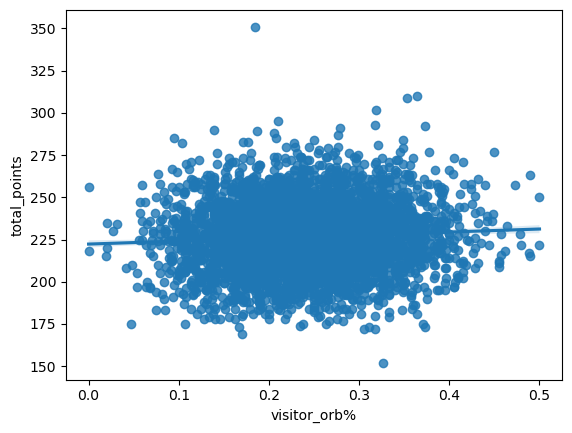

In [425]:
sns.regplot(data=df, x='visitor_orb%', y='total_points')

<Axes: xlabel='visitor_drb%', ylabel='total_points'>

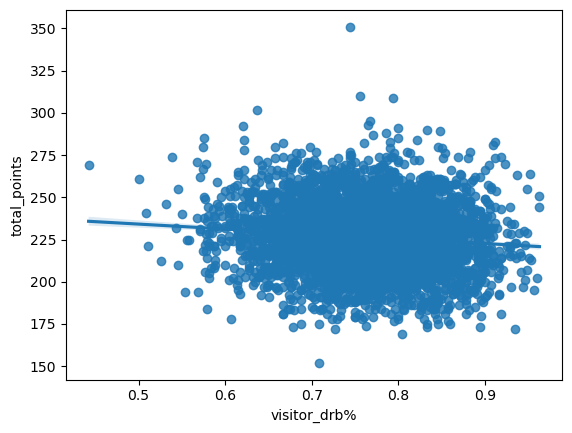

In [426]:
sns.regplot(data=df, x='visitor_drb%', y='total_points')


<Axes: xlabel='visitor_to%', ylabel='total_points'>

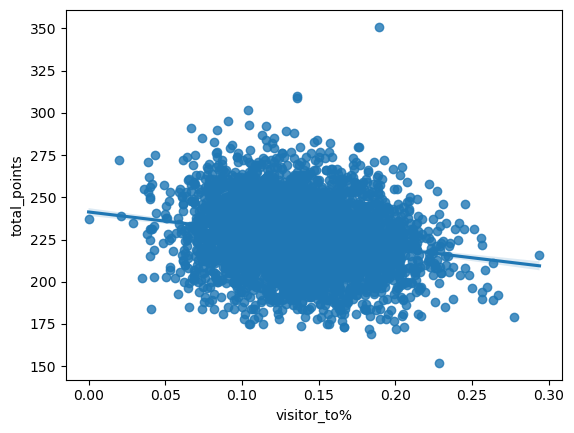

In [427]:
sns.regplot(data=df, x='visitor_to%', y='total_points')

<Axes: xlabel='visitor_efg%', ylabel='total_points'>

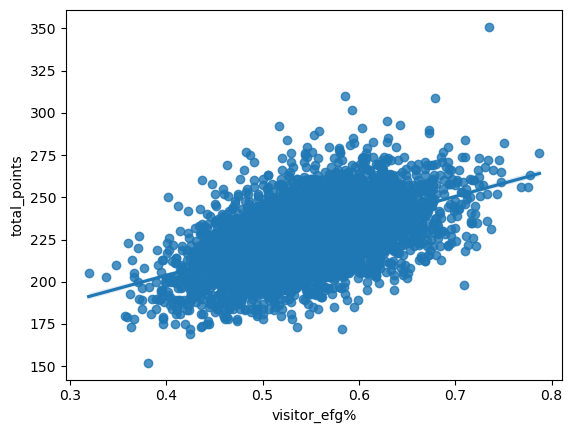

In [428]:
sns.regplot(data=df, x='visitor_efg%', y='total_points')

<Axes: xlabel='visitor_fgm', ylabel='total_points'>

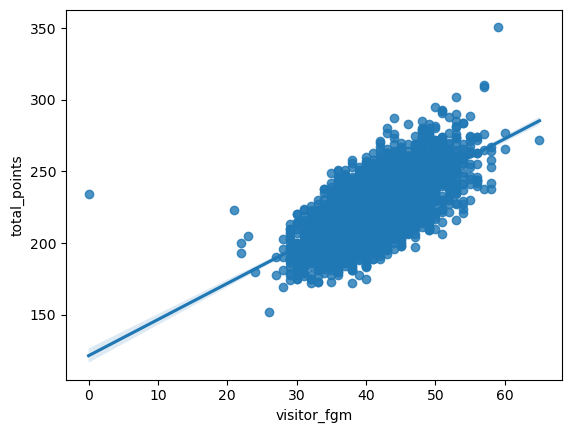

In [429]:
sns.regplot(data=df, x='visitor_fgm', y='total_points')


<Axes: xlabel='visitor_tpp', ylabel='total_points'>

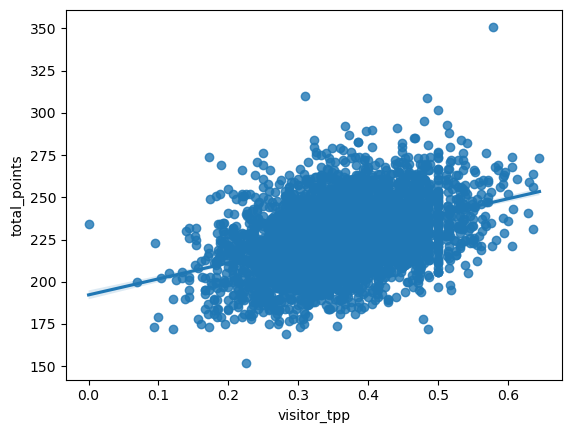

In [430]:
sns.regplot(data=df, x='visitor_tpp', y='total_points')


In [431]:
# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)['total_points'].sort_values(ascending=False)
correlations

total_points               1.000000
visitor_points             0.803503
home_points                0.797448
visitor_fgm                0.670724
home_fgm                   0.659810
                             ...   
home_defReb               -0.170921
visitor_defReb            -0.187582
home_turn_over_ratio      -0.200727
visitor_to%               -0.202052
visitor_turn_over_ratio   -0.230999
Name: total_points, Length: 61, dtype: float64

In [448]:
# Set target column
target_column = 'total_points'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[correlations > -0.5]

# Create new data frame with chosen feature columns
total_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
total_df = pd.concat([df[['home_team', 'visitor_team']], total_df], axis=1)
total_df

,home_team,visitor_team,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,points_diff,rebounds_diff,turnovers_diff,winner,total_points
0,Houston Rockets,Miami Heat,120.0,40.0,86.0,0.465,26.0,31.0,0.839,14.0,...,12.905076,0.546512,0.516129,0.602168,0.547373,-10.0,3.0,4.0,0,230.0
1,Cleveland Cavaliers,Atlanta Hawks,121.0,43.0,97.0,0.443,19.0,21.0,0.905,16.0,...,6.893382,0.525773,0.619048,0.569465,0.623942,-3.0,2.0,7.0,0,239.0
2,Toronto Raptors,LA Clippers,108.0,38.0,78.0,0.487,17.0,19.0,0.895,15.0,...,5.127454,0.583333,0.473958,0.625289,0.524792,8.0,17.0,-5.0,1,224.0
3,Oklahoma City Thunder,New York Knicks,80.0,30.0,81.0,0.370,12.0,22.0,0.545,8.0,...,7.495003,0.419753,0.517241,0.441112,0.527309,15.0,1.0,-1.0,1,175.0
4,Memphis Grizzlies,San Antonio Spurs,105.0,39.0,90.0,0.433,15.0,24.0,0.625,12.0,...,6.162695,0.500000,0.529412,0.522076,0.541086,13.0,11.0,-2.0,1,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,LA Clippers,Memphis Grizzlies,110.0,38.0,99.0,0.384,18.0,26.0,0.692,16.0,...,11.608850,0.464646,0.484375,0.498008,0.530529,4.0,-3.0,-3.0,1,224.0
4068,Portland Trail Blazers,Dallas Mavericks,132.0,48.0,90.0,0.533,24.0,34.0,0.706,12.0,...,13.253348,0.600000,0.505376,0.628811,0.532755,-24.0,7.0,8.0,0,240.0
4069,Indiana Pacers,Golden State Warriors,105.0,39.0,90.0,0.433,15.0,21.0,0.714,12.0,...,8.899436,0.500000,0.548913,0.529021,0.573110,6.0,-1.0,1.0,1,216.0
4070,Phoenix Suns,Denver Nuggets,117.0,46.0,90.0,0.511,9.0,11.0,0.818,16.0,...,11.755486,0.600000,0.475904,0.616828,0.502232,-27.0,-7.0,3.0,0,207.0


In [438]:
# Look for correlation between columns and 'home_win' column
correlations = df.corr(numeric_only=True)['winner'].sort_values(ascending=False)
correlations

winner            1.000000
points_diff       0.796820
home_ORtg         0.532588
visitor_DRtg      0.503001
home_ts%          0.480777
                    ...   
visitor_efg%     -0.457794
visitor_ts%      -0.474052
home_DRtg        -0.480905
visitor_points   -0.490409
visitor_ORtg     -0.508541
Name: winner, Length: 61, dtype: float64

In [447]:
# Set target column
target_column = 'winner'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[(correlations >= -0.5)]

# Create new data frame with chosen feature columns
winner_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
winner_df = pd.concat([df[['home_team', 'visitor_team']], winner_df], axis=1)
winner_df

,home_team,visitor_team,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,points_diff,rebounds_diff,turnovers_diff,winner,total_points
0,Houston Rockets,Miami Heat,120.0,40.0,86.0,0.465,26.0,31.0,0.839,14.0,...,12.905076,0.546512,0.516129,0.602168,0.547373,-10.0,3.0,4.0,0,230.0
1,Cleveland Cavaliers,Atlanta Hawks,121.0,43.0,97.0,0.443,19.0,21.0,0.905,16.0,...,6.893382,0.525773,0.619048,0.569465,0.623942,-3.0,2.0,7.0,0,239.0
2,Toronto Raptors,LA Clippers,108.0,38.0,78.0,0.487,17.0,19.0,0.895,15.0,...,5.127454,0.583333,0.473958,0.625289,0.524792,8.0,17.0,-5.0,1,224.0
3,Oklahoma City Thunder,New York Knicks,80.0,30.0,81.0,0.370,12.0,22.0,0.545,8.0,...,7.495003,0.419753,0.517241,0.441112,0.527309,15.0,1.0,-1.0,1,175.0
4,Memphis Grizzlies,San Antonio Spurs,105.0,39.0,90.0,0.433,15.0,24.0,0.625,12.0,...,6.162695,0.500000,0.529412,0.522076,0.541086,13.0,11.0,-2.0,1,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,LA Clippers,Memphis Grizzlies,110.0,38.0,99.0,0.384,18.0,26.0,0.692,16.0,...,11.608850,0.464646,0.484375,0.498008,0.530529,4.0,-3.0,-3.0,1,224.0
4068,Portland Trail Blazers,Dallas Mavericks,132.0,48.0,90.0,0.533,24.0,34.0,0.706,12.0,...,13.253348,0.600000,0.505376,0.628811,0.532755,-24.0,7.0,8.0,0,240.0
4069,Indiana Pacers,Golden State Warriors,105.0,39.0,90.0,0.433,15.0,21.0,0.714,12.0,...,8.899436,0.500000,0.548913,0.529021,0.573110,6.0,-1.0,1.0,1,216.0
4070,Phoenix Suns,Denver Nuggets,117.0,46.0,90.0,0.511,9.0,11.0,0.818,16.0,...,11.755486,0.600000,0.475904,0.616828,0.502232,-27.0,-7.0,3.0,0,207.0


In [449]:
# Export both Dataframes for model 3 
total_df.to_csv('./data/totalPoint_ML3.csv', index=False)
winner_df.to_csv('./data/winPredict_ML3.csv', index=False)